# Predicting the success of American Football Quarterbacks in the NFL by their physical attributes, as measured in the 'Combine' (a day of physical tests), that they perform prior to being drafted into the league.

### I am looking at the year 2019, so i am starting by pulling all of the data on anyone who through a forward pass during the 2019 season. This is stored on the NFL.com website, split over 4 pages and is their record of performance for the 2019 season only.

#### Start by importing the packages needed to run the code


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
from bs4 import BeautifulSoup as bs
import numpy as np

#### As there are 4 pages i have defined a function to do this, to save repeating the same clock of code 4 times. 

#### Firstly get the URL of the 4 pages

In [2]:
URL_page1 = 'https://www.nfl.com/stats/player-stats/category/passing/2019/POST/all/passingyards/DESC'

In [3]:
URL_page2 = 'https://www.nfl.com/stats/player-stats/category/passing/2019/REG/all/passingYards/DESC?aftercursor=0000001900000000008500100079000840a7a000000000006e00000005000000045f74626c00000010706572736f6e5f7465616d5f737461740000000565736249640000000944415234363631343100000004726f6c6500000003504c5900000008736561736f6e496400000004323031390000000a736561736f6e5479706500000003524547f07fffffe6f07fffffe6389bd3f93412939a78c1e6950d620d060004'

In [4]:
URL_page3 = 'https://www.nfl.com/stats/player-stats/category/passing/2019/REG/all/passingYards/DESC?aftercursor=0000003200000000008500100079000840774000000000006e00000005000000045f74626c00000010706572736f6e5f7465616d5f7374617400000005657362496400000009484f5934343037393100000004726f6c6500000003504c5900000008736561736f6e496400000004323031390000000a736561736f6e5479706500000003524547f07fffffcdf07fffffcde1b4eec7a1741bd5f74fd8fb646123be0004'

In [5]:
URL_page4 = 'https://www.nfl.com/stats/player-stats/category/passing/2019/REG/all/passingYards/DESC?aftercursor=0000004b00000000008500100079000840320000000000006e00000005000000045f74626c00000010706572736f6e5f7465616d5f737461740000000565736249640000000947524932393433353100000004726f6c6500000003504c5900000008736561736f6e496400000004323031390000000a736561736f6e5479706500000003524547f07fffffb4f07fffffb496fe1975c31781501d74d08e00f977e80004'

#### Then define the Function 'GetPage'

In [6]:
def GetPage (URL_page_n):
    """ This function gets the webpage passed to it and pulls out the table of NFL passers shown on it"""
    Page = requests.get(URL_page_n)
    Page = bs(Page.content, 'lxml')
    Page = Page.find('table',{'class':"d3-o-table"})
    Page = pd.read_html(str(Page))[0]
    return Page

#### Get the 4 pages from the website, and join them vertically into a single dataframe

In [7]:
Page1 = GetPage(URL_page1)
Page1.shape

(25, 16)

In [8]:
Page2 = GetPage(URL_page2)
Page2.shape

(25, 16)

In [9]:
Page3 = GetPage(URL_page3)
Page3.shape

(25, 16)

In [10]:
Page4 = GetPage(URL_page4)
Page4.shape

(15, 16)

In [11]:
All_passers_2019 = pd.concat([Page1, Page2, Page3, Page4], ignore_index = True)
All_passers_2019.head

<bound method NDFrame.head of             Player  Pass Yds  Yds/Att  Att  Cmp  Cmp %  TD  INT   Rate  1st  \
0   Jameis Winston      5109      8.2  626  380  0.607  33   30   84.3  243   
1     Dak Prescott      4902      8.2  596  388  0.651  30   11   99.7  229   
2       Jared Goff      4638      7.4  626  394  0.629  22   16   86.5  220   
3    Philip Rivers      4615      7.8  591  390  0.660  23   20   88.5  217   
4        Matt Ryan      4466      7.3  616  408  0.662  26   14   92.1  228   
..             ...       ...      ...  ...  ...    ...  ..  ...    ...  ...   
85  Trevor Siemian         3      0.5    6    3  0.500   0    0   56.3    0   
86   Blake Bortles         3      1.5    2    1  0.500   0    0   56.3    0   
87   Kenjon Barner         3      3.0    1    1  1.000   0    0   79.2    0   
88     Alex Tanney         1      1.0    1    1  1.000   0    0   79.2    0   
89      Matt Haack         1      1.0    1    1  1.000   1    0  118.8    1   

     1st%  20+  40+  

#### The shape of the dataframe is 90 rows, so each line has been added to the dataframe correctly. We can check to see if there are any entries missing

In [12]:
All_passers_2019.isnull().sum()

Player      0
Pass Yds    0
Yds/Att     0
Att         0
Cmp         0
Cmp %       0
TD          0
INT         0
Rate        0
1st         0
1st%        0
20+         0
40+         0
Lng         0
Sck         0
SckY        0
dtype: int64

#### I'm going to create a two new colummns which I am going to use later as a measure of how proficient each Quarterback was in the 2019 Season. 

1. The number of succesful Touchdowns they threw minus the number of times they were intercepted.
2. The number of interceptions they through as a percentage of the total number of attempted throws they made during the season

In [13]:
All_passers_2019['TD-INT'] = All_passers_2019['TD'] - All_passers_2019['INT'] # The higher number the better
All_passers_2019['INT%'] = All_passers_2019['TD'] / All_passers_2019['Att'] # The lower the % the better
All_passers_2019.head()

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,TD-INT,INT%
0,Jameis Winston,5109,8.2,626,380,0.607,33,30,84.3,243,0.388,75,13,71,47,282,3,0.052716
1,Dak Prescott,4902,8.2,596,388,0.651,30,11,99.7,229,0.384,68,16,62,23,151,19,0.050336
2,Jared Goff,4638,7.4,626,394,0.629,22,16,86.5,220,0.351,72,6,66,22,170,6,0.035144
3,Philip Rivers,4615,7.8,591,390,0.660,23,20,88.5,217,0.367,57,12,84,34,222,3,0.038917
4,Matt Ryan,4466,7.3,616,408,0.662,26,14,92.1,228,0.370,47,5,93,48,316,12,0.042208


#### I am also going to change the name of one of the columns from 'Rate' to 'Rating'. This is the QB rating a mathematical formula we will see later which looks to mathematically quantify how effective a Quarterback is performing. (I think that rate is a bit misleading).


In [14]:
All_passers_2019 = All_passers_2019.rename(columns={'Rate':'Rating'})

In [15]:
All_passers_2019.head()

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rating,1st,1st%,20+,40+,Lng,Sck,SckY,TD-INT,INT%
0,Jameis Winston,5109,8.2,626,380,0.607,33,30,84.3,243,0.388,75,13,71,47,282,3,0.052716
1,Dak Prescott,4902,8.2,596,388,0.651,30,11,99.7,229,0.384,68,16,62,23,151,19,0.050336
2,Jared Goff,4638,7.4,626,394,0.629,22,16,86.5,220,0.351,72,6,66,22,170,6,0.035144
3,Philip Rivers,4615,7.8,591,390,0.660,23,20,88.5,217,0.367,57,12,84,34,222,3,0.038917
4,Matt Ryan,4466,7.3,616,408,0.662,26,14,92.1,228,0.370,47,5,93,48,316,12,0.042208



#### Next load a CSV file from my local drive that I have previously downloaded from Kaggle.com. I have called this 'combine.csv' and is a record of everyone who went to the draft from 1987 to 2021 and recoreds their combine scores of physical tests that they performed.


In [16]:
Combine_stats = pd.read_csv('/Users/mcheesmore/UCDPA_MarkCheesmore/combine.csv')
print(Combine_stats.head())
Combine_stats.shape

   combineId  playerId  combineYear combinePosition  combineHeight  \
0      10000  19870067         1987              CB           69.8   
1      10001  19870154         1987               C           74.8   
2      10002  19870800         1987              FB           71.8   
3      10003  19870121         1987               C           75.0   
4      10004  19870801         1987              WR           72.1   

   combineWeight  combineHand nameFirst   nameLast         nameFull  ...  \
0            198         8.50   Michael      Adams    Michael Adams  ...   
1            266        10.25      John    Adickes     John Adickes  ...   
2            217         9.00     Tommy       Agee       Tommy Agee  ...   
3            279        10.50     David  Alexander  David Alexander  ...   
4            202        10.00    Lyneal     Alston    Lyneal Alston  ...   

  hsCountry  combineArm combine40yd combineVert  combineBench  combineShuttle  \
0       NaN       30.50        4.42      

(10080, 35)

#### We can see that this has 10,080 records and 35 Categories, and from below that it is not a very complete dataset and there are many null fields, however we won't use them all.

In [17]:
Combine_stats.isnull().sum()

combineId                0
playerId                 0
combineYear              0
combinePosition          0
combineHeight            0
combineWeight            0
combineHand           6488
nameFirst                2
nameLast                 2
nameFull                 2
position                 3
collegeId                2
nflId                 1087
college                  2
heightInches             7
weight                   7
dob                   1589
ageAtDraft            1589
playerProfileUrl      1087
homeCity              2558
homeState             2707
homeCountry           2511
highSchool            5908
hsCity                7753
hsState               5923
hsCountry             5908
combineArm            6803
combine40yd           1058
combineVert           1619
combineBench          2912
combineShuttle        2594
combineBroad          1769
combine3cone          5266
combine60ydShuttle    8307
combineWonderlic      9715
dtype: int64

#### There are a number of columns that i don't want (School/IDs/College etc.) so to reduce the columns i end up with, and to make the final merged Dataframe more manigable i will remove some of these.

In [18]:
Combine_stats.drop(['combineId', 'playerId','nameFirst','nameLast','collegeId','nflId','college','heightInches','weight','playerProfileUrl',"homeCity","homeState",'homeCountry', 'highSchool', 'hsCity', 'hsState', 'hsCountry'], axis = 1, inplace=True)

In [19]:
Combine_stats.head()

,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nameFull,position,dob,ageAtDraft,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
0,1987,CB,69.8,198,8.50,Michael Adams,DB,1964-04-05,23.076712,30.50,4.42,32.0,13.0,4.60,118.0,NaN,11.91,NaN
1,1987,C,74.8,266,10.25,John Adickes,C,1964-06-29,22.843836,30.00,4.97,26.5,25.0,4.60,103.0,NaN,NaN,NaN
2,1987,FB,71.8,217,9.00,Tommy Agee,FB,NaN,NaN,30.75,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN
3,1987,C,75.0,279,10.50,David Alexander,C,1964-07-28,22.764384,32.75,5.13,27.5,22.0,4.33,105.0,NaN,NaN,NaN
4,1987,WR,72.1,202,10.00,Lyneal Alston,WR,1964-07-23,22.778082,33.00,4.64,32.0,7.0,4.52,114.0,NaN,11.85,NaN


## Merge the NFL scraped tables to the combine CSV

In [20]:
Passers_and_combine_2019 = All_passers_2019.merge(Combine_stats, how = 'left', left_on='Player', right_on='nameFull')
Passers_and_combine_2019.shape

(93, 36)

#### Clear duplicates - So we have now combined on the players name, but the rows have gone from 90 to 93, so we have 3 duplicates to investigate.

In [21]:
Passers_and_combine_2019[Passers_and_combine_2019.duplicated(['Player'])]

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rating,1st,...,ageAtDraft,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
23,Josh Allen,3089,6.7,461,271,0.588,20,9,85.3,146,...,21.805479,NaN,4.63,NaN,28.0,4.23,118.0,7.15,NaN,NaN
25,Daniel Jones,3027,6.6,459,284,0.619,24,12,87.7,140,...,21.934247,NaN,4.81,33.5,NaN,4.41,120.0,7.00,NaN,NaN
70,John Brown,28,28.0,1,1,1.000,1,0,158.3,1,...,24.112329,NaN,4.34,36.5,NaN,4.12,117.0,6.91,NaN,NaN


In [22]:
print(Passers_and_combine_2019['position'].loc[22:23])

22    QB
23    DE
Name: position, dtype: object


#### I can see from this that the second entry is incorrect, Josh Allen is s QB (quarterback) so i need to remove line 23

In [23]:
Passers_and_combine_2019 = Passers_and_combine_2019.drop(23)

In [24]:
Passers_and_combine_2019[Passers_and_combine_2019.duplicated(['Player'])]

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rating,1st,...,ageAtDraft,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
25,Daniel Jones,3027,6.6,459,284,0.619,24,12,87.7,140,...,21.934247,NaN,4.81,33.5,NaN,4.41,120.0,7.00,NaN,NaN
70,John Brown,28,28.0,1,1,1.000,1,0,158.3,1,...,24.112329,NaN,4.34,36.5,NaN,4.12,117.0,6.91,NaN,NaN


In [25]:
print(Passers_and_combine_2019['position'].loc[24:25])

24    WR
25    QB
Name: position, dtype: object


#### For Daniel Jones it is the second line (line 25) that needs to be retained (he is also a QB).

In [26]:
Passers_and_combine_2019 = Passers_and_combine_2019.drop(25)

In [27]:
Passers_and_combine_2019[Passers_and_combine_2019.duplicated(['Player'])]

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rating,1st,...,ageAtDraft,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
70,John Brown,28,28.0,1,1,1.0,1,0,158.3,1,...,24.112329,NaN,4.34,36.5,NaN,4.12,117.0,6.91,NaN,NaN


In [28]:
print(Passers_and_combine_2019['position'].loc[69:70])

69    WR
70    WR
Name: position, dtype: object


#### I can't tell from this - as John Brown is a wide receiver, so looking at a wider selection of columns

In [29]:
print(Passers_and_combine_2019.loc[69:70])

        Player  Pass Yds  Yds/Att  Att  Cmp  Cmp %  TD  INT  Rating  1st  ...  \
69  John Brown        28     28.0    1    1    1.0   1    0   158.3    1  ...   
70  John Brown        28     28.0    1    1    1.0   1    0   158.3    1  ...   

    ageAtDraft  combineArm  combine40yd  combineVert  combineBench  \
69   21.747945        34.5         4.59         35.0           NaN   
70   24.112329         NaN         4.34         36.5           NaN   

    combineShuttle  combineBroad  combine3cone  combine60ydShuttle  \
69            4.18         127.0           NaN                11.1   
70            4.12         117.0          6.91                 NaN   

   combineWonderlic  
69              NaN  
70              NaN  

[2 rows x 36 columns]


#### So WR (wide receivers) do the 60 yd Shuttle, and don't do the combine 3cone, (from googling) so i need to keep line 69 and lose line 70.

In [30]:
Passers_and_combine_2019 = Passers_and_combine_2019.drop(70)

In [31]:
Passers_and_combine_2019[Passers_and_combine_2019.duplicated(['Player'])]

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rating,1st,...,ageAtDraft,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic


In [32]:
Passers_and_combine_2019

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rating,1st,...,ageAtDraft,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
0,Jameis Winston,5109,8.2,626,380,0.607,33,30,84.3,243,...,21.326027,NaN,4.97,28.5,NaN,4.36,103.0,7.16,NaN,NaN
1,Dak Prescott,4902,8.2,596,388,0.651,30,11,99.7,229,...,22.764384,NaN,4.79,32.5,NaN,4.32,116.0,7.11,NaN,NaN
2,Jared Goff,4638,7.4,626,394,0.629,22,16,86.5,220,...,21.553425,NaN,4.82,27.0,NaN,4.47,110.0,7.17,NaN,36.0
3,Philip Rivers,4615,7.8,591,390,0.660,23,20,88.5,217,...,22.391781,NaN,5.08,NaN,NaN,NaN,NaN,NaN,NaN,30.0
4,Matt Ryan,4466,7.3,616,408,0.662,26,14,92.1,228,...,22.958904,NaN,4.94,NaN,NaN,4.51,NaN,7.40,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Trevor Siemian,3,0.5,6,3,0.500,0,0,56.3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Blake Bortles,3,1.5,2,1,0.500,0,0,56.3,0,...,22.041096,NaN,4.93,32.5,NaN,4.21,114.0,7.08,NaN,28.0
90,Kenjon Barner,3,3.0,1,1,1.000,0,0,79.2,0,...,24.008219,NaN,4.52,35.5,20.0,4.20,122.0,6.87,NaN,NaN
91,Alex Tanney,1,1.0,1,1,1.000,0,0,79.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Reset the Row Index

In [33]:
Passers_and_combine_2019.reset_index(inplace = True, drop = True)

In [34]:
Passers_and_combine_2019

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rating,1st,...,ageAtDraft,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
0,Jameis Winston,5109,8.2,626,380,0.607,33,30,84.3,243,...,21.326027,NaN,4.97,28.5,NaN,4.36,103.0,7.16,NaN,NaN
1,Dak Prescott,4902,8.2,596,388,0.651,30,11,99.7,229,...,22.764384,NaN,4.79,32.5,NaN,4.32,116.0,7.11,NaN,NaN
2,Jared Goff,4638,7.4,626,394,0.629,22,16,86.5,220,...,21.553425,NaN,4.82,27.0,NaN,4.47,110.0,7.17,NaN,36.0
3,Philip Rivers,4615,7.8,591,390,0.660,23,20,88.5,217,...,22.391781,NaN,5.08,NaN,NaN,NaN,NaN,NaN,NaN,30.0
4,Matt Ryan,4466,7.3,616,408,0.662,26,14,92.1,228,...,22.958904,NaN,4.94,NaN,NaN,4.51,NaN,7.40,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Trevor Siemian,3,0.5,6,3,0.500,0,0,56.3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Blake Bortles,3,1.5,2,1,0.500,0,0,56.3,0,...,22.041096,NaN,4.93,32.5,NaN,4.21,114.0,7.08,NaN,28.0
87,Kenjon Barner,3,3.0,1,1,1.000,0,0,79.2,0,...,24.008219,NaN,4.52,35.5,20.0,4.20,122.0,6.87,NaN,NaN
88,Alex Tanney,1,1.0,1,1,1.000,0,0,79.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Creating a new column of Experience which reflects the number of years the Quaterbacks have been active in the NFL

In [35]:
Passers_and_combine_2019['Experience'] = 2019 - Passers_and_combine_2019['combineYear']

In [36]:
Passers_and_combine_2019.isnull().sum()

Player                 0
Pass Yds               0
Yds/Att                0
Att                    0
Cmp                    0
Cmp %                  0
TD                     0
INT                    0
Rating                 0
1st                    0
1st%                   0
20+                    0
40+                    0
Lng                    0
Sck                    0
SckY                   0
TD-INT                 0
INT%                   0
combineYear           22
combinePosition       22
combineHeight         22
combineWeight         22
combineHand           89
nameFull              22
position              22
dob                   23
ageAtDraft            23
combineArm            89
combine40yd           27
combineVert           32
combineBench          82
combineShuttle        37
combineBroad          34
combine3cone          41
combine60ydShuttle    89
combineWonderlic      59
Experience            22
dtype: int64

### Now my original Passers list contained anyone who threw a forwrad pass in the regular season, this is predominanetly quaterbacks, but on trick plays, Wide receivers, Running backs and Kickers also throw the ball forward.

In [37]:
Passers_and_combine_2019.groupby(['position'])['position'].count()

position
QB    57
RB     3
TE     1
WR     7
Name: position, dtype: int64

#### And we can see they distort the overall picture, and that QBs don't do some of the tests, like the bench press

In [38]:
Passers_and_combine_2019.groupby('position')['Att'].agg([min,max,'mean'])

,min,max,mean
position,,,
QB,2,626,287.192982
RB,1,1,1.000000
TE,5,5,5.000000
WR,1,459,66.714286


In [39]:
Passers_and_combine_2019.groupby('position')['combineBench'].agg([min,max,'mean'])

,min,max,mean
position,,,
QB,NaN,NaN,NaN
RB,15.0,23.0,19.333333
TE,18.0,18.0,18.000000
WR,10.0,18.0,13.750000


#### So lets remove the non-QB passers from the dataframe

In [40]:
QB_combine_2019 = Passers_and_combine_2019[Passers_and_combine_2019['position'].isin(['QB'])]

In [41]:
QB_combine_2019.shape

(57, 37)

In [42]:
QB_combine_2019.isnull().sum()

Player                 0
Pass Yds               0
Yds/Att                0
Att                    0
Cmp                    0
Cmp %                  0
TD                     0
INT                    0
Rating                 0
1st                    0
1st%                   0
20+                    0
40+                    0
Lng                    0
Sck                    0
SckY                   0
TD-INT                 0
INT%                   0
combineYear            0
combinePosition        0
combineHeight          0
combineWeight          0
combineHand           57
nameFull               0
position               0
dob                    0
ageAtDraft             0
combineArm            57
combine40yd            4
combineVert            9
combineBench          57
combineShuttle        14
combineBroad          11
combine3cone          15
combine60ydShuttle    57
combineWonderlic      27
Experience             0
dtype: int64

#### and remove the columns which have no values

In [43]:
QB_combine_2019_reduced = QB_combine_2019.dropna(how='all', axis='columns')

In [44]:
 QB_combine_2019_reduced.shape

(57, 33)

## Now we can start looking for correlations and relationships within the merged dataset

In [45]:
Significant = QB_combine_2019_reduced.corr()

<AxesSubplot:>

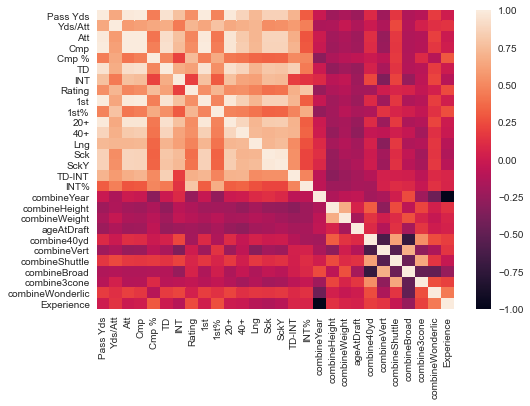

In [46]:
sns.heatmap(Significant)

<AxesSubplot:xlabel='combine40yd', ylabel='Count'>

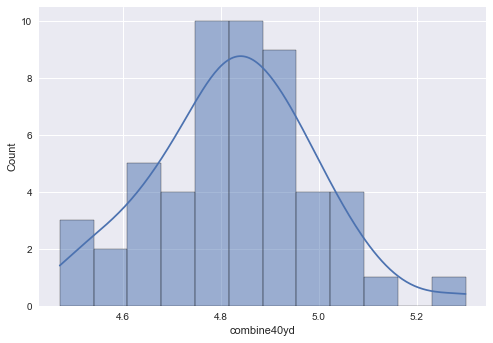

In [47]:
sns.histplot(data=QB_combine_2019_reduced, x="combine40yd", bins=12, kde=True)

<AxesSubplot:xlabel='combineShuttle', ylabel='Count'>

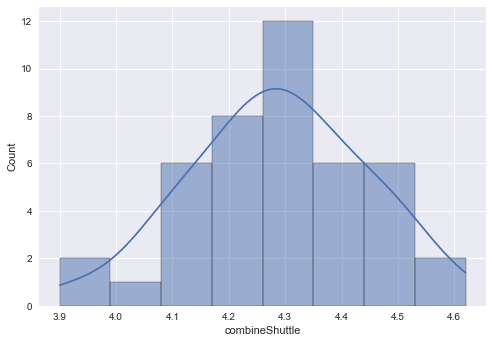

In [48]:
sns.histplot(data=QB_combine_2019_reduced, x="combineShuttle", bins=8, kde=True)

<AxesSubplot:xlabel='TD-INT', ylabel='Rating'>

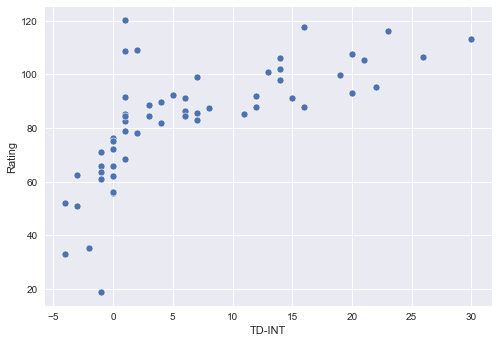

In [49]:
sns.scatterplot(y="Rating",x='TD-INT', data = QB_combine_2019_reduced)

In [50]:
Worst_40yd = QB_combine_2019_reduced['combine40yd'].quantile(q=0.75)
Best_40yd = QB_combine_2019_reduced['combine40yd'].quantile(q=0.25)
Mean_40yd = QB_combine_2019_reduced['combine40yd'].mean()
print('Worst is..', Worst_40yd)
print('Best is..', Best_40yd)
print('mean25 is..', Mean_40yd)

Worst is.. 4.94
Best is.. 4.73
mean25 is.. 4.82754716981132


In [51]:
pd.set_option('mode.chained_assignment', None) #sorry about this, i understand the issue but couldn't fix it
QB_combine_2019_reduced['40 yard dash'] = 'Other'
QB_combine_2019_reduced.loc[QB_combine_2019_reduced['combine40yd'] < Best_40yd, '40 yard dash'] = 'Top 25%'

In [52]:
QB_combine_2019_reduced.head()

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rating,1st,...,dob,ageAtDraft,combine40yd,combineVert,combineShuttle,combineBroad,combine3cone,combineWonderlic,Experience,40 yard dash
0,Jameis Winston,5109,8.2,626,380,0.607,33,30,84.3,243,...,1994-01-06,21.326027,4.97,28.5,4.36,103.0,7.16,NaN,4.0,Other
1,Dak Prescott,4902,8.2,596,388,0.651,30,11,99.7,229,...,1993-07-29,22.764384,4.79,32.5,4.32,116.0,7.11,NaN,3.0,Other
2,Jared Goff,4638,7.4,626,394,0.629,22,16,86.5,220,...,1994-10-14,21.553425,4.82,27.0,4.47,110.0,7.17,36.0,3.0,Other
3,Philip Rivers,4615,7.8,591,390,0.660,23,20,88.5,217,...,1981-12-08,22.391781,5.08,NaN,NaN,NaN,NaN,30.0,15.0,Other
4,Matt Ryan,4466,7.3,616,408,0.662,26,14,92.1,228,...,1985-05-17,22.958904,4.94,NaN,4.51,NaN,7.40,32.0,11.0,Other


<AxesSubplot:xlabel='TD-INT', ylabel='Rating'>

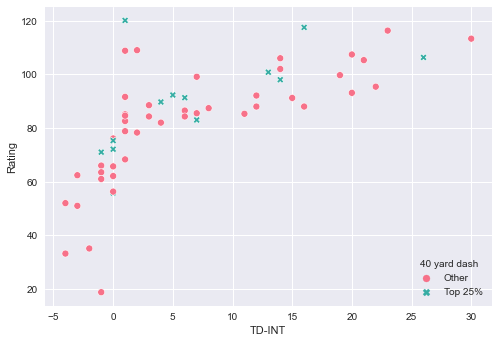

In [53]:
sns.scatterplot(y="Rating",x='TD-INT', data = QB_combine_2019_reduced, hue='40 yard dash',palette="husl", style ='40 yard dash')

In [54]:
Worst_Shuttle = QB_combine_2019_reduced['combineShuttle'].quantile(q=0.75)
Best_Shuttle = QB_combine_2019_reduced['combineShuttle'].quantile(q=0.25)
Mean_Shuttle = QB_combine_2019_reduced['combineShuttle'].mean()
print('Worst is..', Worst_Shuttle)
print('Best is..', Best_Shuttle)
print('mean25 is..', Mean_Shuttle)

Worst is.. 4.395
Best is.. 4.2
mean25 is.. 4.285813953488373


In [55]:
QB_combine_2019_reduced['Shuttle'] = 'Other'
QB_combine_2019_reduced.loc[QB_combine_2019_reduced['combineShuttle'] < Best_Shuttle, 'Shuttle'] = 'Top 25%'

<AxesSubplot:xlabel='TD-INT', ylabel='Rating'>

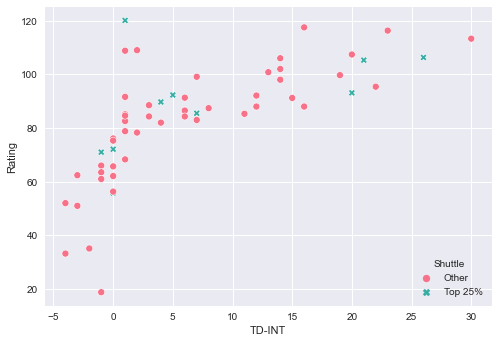

In [56]:
sns.scatterplot(y="Rating",x='TD-INT', data = QB_combine_2019_reduced, hue='Shuttle', palette="husl", style='Shuttle')

<AxesSubplot:xlabel='TD-INT', ylabel='Rating'>

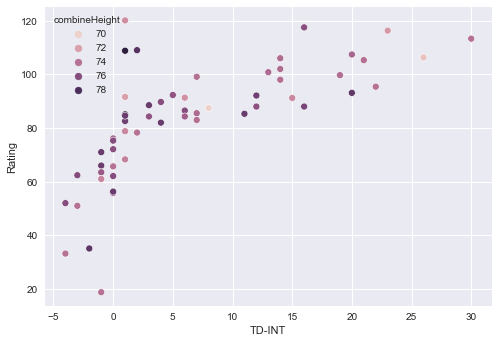

In [57]:
sns.scatterplot(y="Rating",x='TD-INT', data = QB_combine_2019_reduced, hue='combineHeight')

In [58]:
Oldest = QB_combine_2019_reduced['Experience'].quantile(q=0.75)
Youngest = QB_combine_2019_reduced['Experience'].quantile(q=0.25)
AverageAge = QB_combine_2019_reduced['Experience'].mean()
print('Oldest 25% is..', Oldest)
print('Youngest 25%..', Youngest)
print('Average age of the QBs in 209 was..', Mean_40yd)

Oldest 25% is.. 9.0
Youngest 25%.. 2.0
Average age of the QBs in 209 was.. 4.82754716981132


<AxesSubplot:xlabel='Experience', ylabel='Count'>

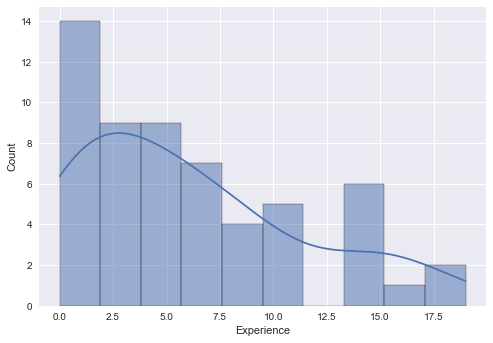

In [59]:
sns.histplot(data=QB_combine_2019_reduced, x="Experience", bins=10, kde=True)